In [71]:
import dask.dataframe as dd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go

In [72]:
def read_data(input_path):
    raw_data = dd.read_csv(input_path)
    return raw_data

In [73]:
data = read_data('https://gist.githubusercontent.com/aromerovilla/7170e4ff45dd943af6a920d2f510cd0f/raw/b5732e3122ca9d0dec95717b62434e2b68e642b6/hour.csv')

In [74]:
data.info()
data.dtypes

<class 'dask.dataframe.core.DataFrame'>
Columns: 17 entries, instant to cnt
dtypes: object(1), float64(4), int64(12)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [75]:
daily = read_data('https://gist.githubusercontent.com/alombatti/60c99f57b916b5c121abbd713273ab86/raw/3618d0d08251995be6550e53980f0c5ffdbbf4c8/daydata.csv')

In [76]:
daily.info()
daily.dtypes

<class 'dask.dataframe.core.DataFrame'>
Columns: 16 entries, instant to cnt
dtypes: object(1), float64(4), int64(11)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [77]:
daily = daily.sample(frac = 1.368, replace=True)
data = data.sample(frac = 1.368, replace=True)

In [78]:
daily.compute()
data.compute()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6159,6160,2011-09-19,3,0,9,5,0,1,1,2,0.50,0.4848,0.77,0.1940,2,26,28
11318,11319,2012-04-21,2,1,4,19,0,6,0,3,0.56,0.5303,0.73,0.4925,9,45,54
12300,12301,2012-06-01,2,1,6,17,0,5,1,3,0.70,0.6515,0.70,0.2537,25,202,227
7118,7119,2011-10-29,4,0,10,5,0,6,0,3,0.26,0.2273,0.93,0.3582,0,1,1
503,504,2011-01-23,1,0,1,1,0,0,0,1,0.04,0.0758,0.57,0.1045,1,12,13
4427,4428,2011-07-08,3,0,7,9,0,5,1,2,0.76,0.7273,0.70,0.2985,30,211,241
5763,5764,2011-09-02,3,0,9,14,0,5,1,2,0.70,0.6515,0.61,0.1045,75,208,283
9943,9944,2012-02-24,1,1,2,8,0,5,1,2,0.38,0.3939,0.76,0.3284,17,452,469
11470,11471,2012-04-28,2,1,4,3,0,6,0,1,0.34,0.3182,0.49,0.2239,3,23,26
12742,12743,2012-06-20,2,1,6,3,0,3,1,1,0.66,0.6061,0.83,0.1343,2,6,8


In [79]:
# Configuring plotting visual and sizes
sns.set_style('white')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [80]:
season_col = ["#749ee8", '#ffc9b9','#e69479','#b2d7ff']
month_col = ["#749ee8","#749ee8","#749ee8", '#ffc9b9','#ffc9b9','#ffc9b9','#e69479','#e69479','#e69479','#b2d7ff','#b2d7ff','#b2d7ff']

AttributeError: 'DataFrame' object has no attribute 'get'

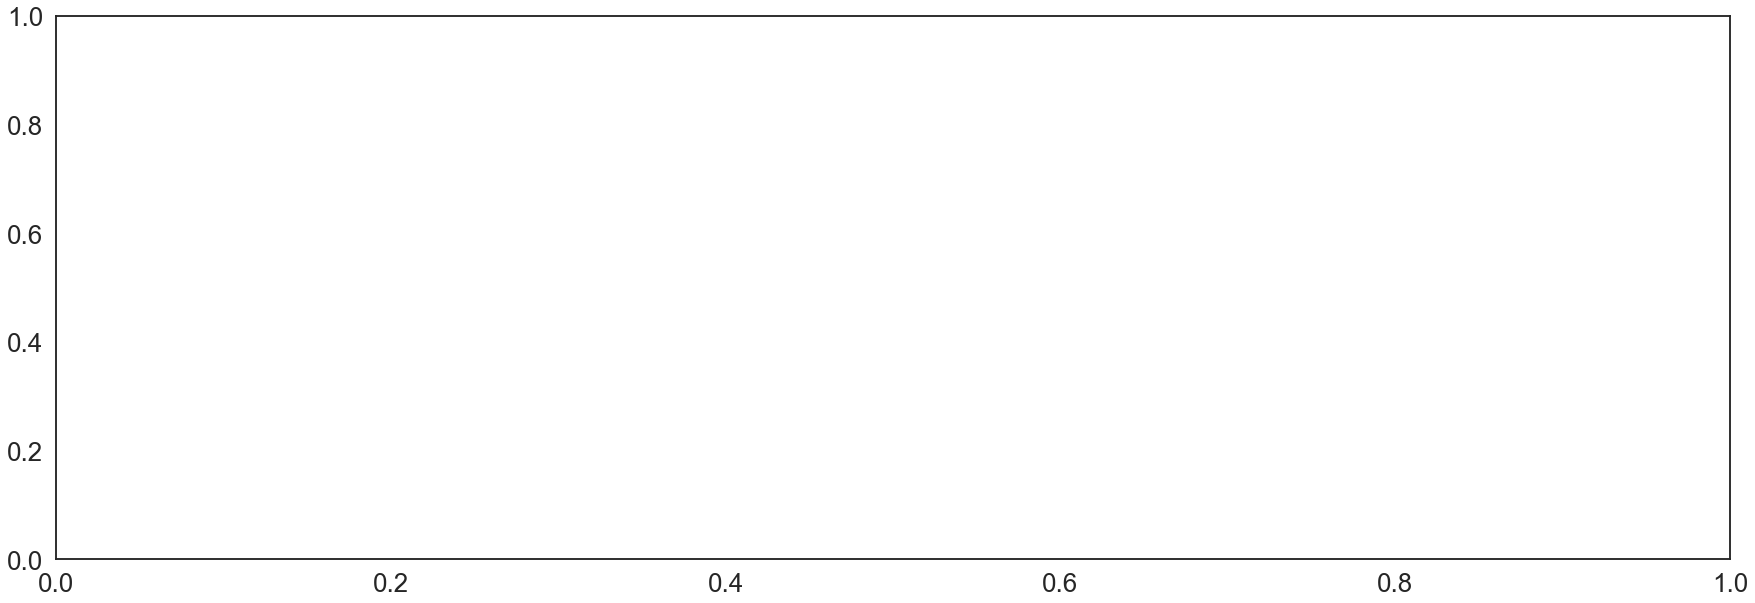

In [81]:
fig, ax = plt.subplots()
monthly_plot = sns.barplot(data = data[['mnth',
                                        'cnt']],
                           x = 'mnth',
                           y = 'cnt',
                           ci = None,
                           palette=month_col,
                           estimator = sum)
ax.set(xlabel = 'Month of the year', ylabel = 'Total count of bikes', title = 'Total count of bikes per month')
ax.set_xticklabels(['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

AttributeError: 'DataFrame' object has no attribute 'get'

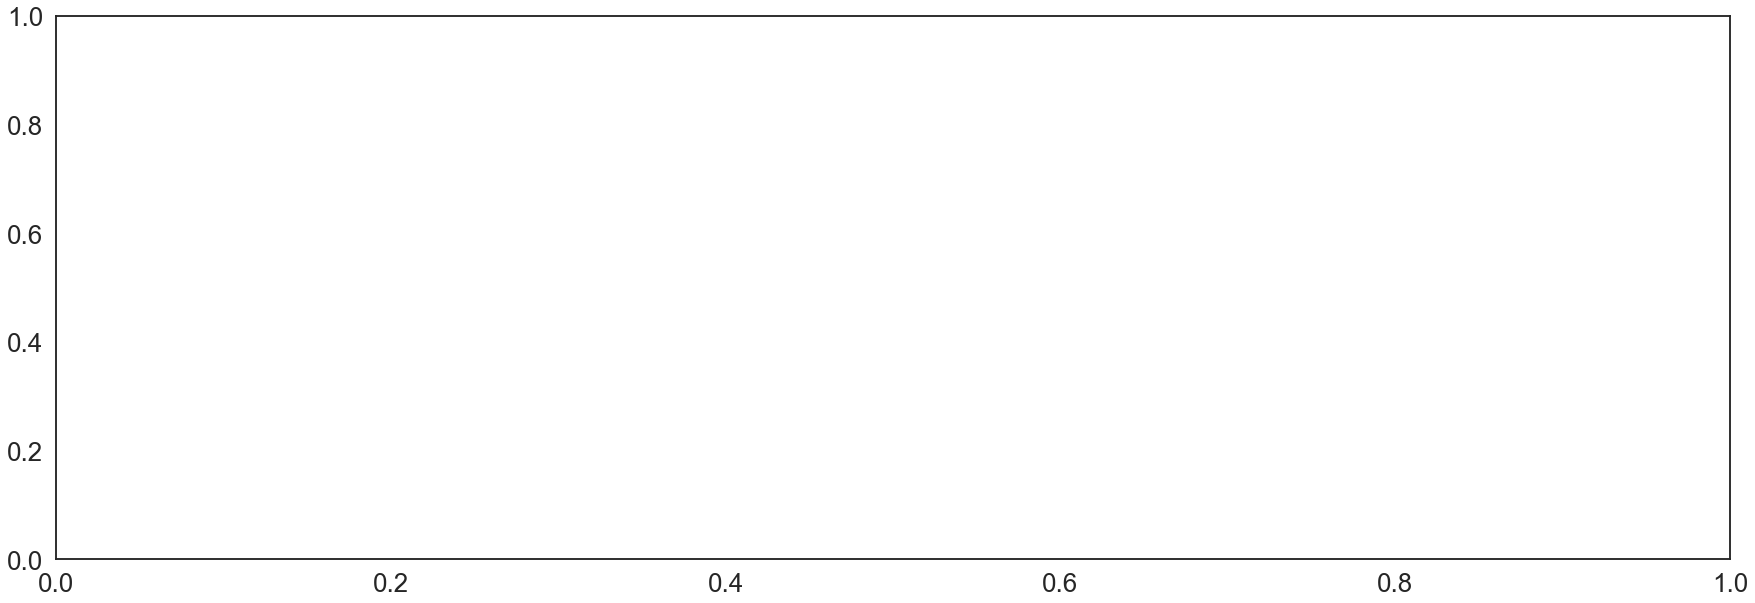

In [82]:
# Number of bikes rented per season
fig, ax = plt.subplots()
plot = sns.barplot('yr',
                   'cnt',
                   hue = 'season',
                   data = data,
                   ci = None,
                   palette=season_col,
                   estimator = sum)
ax.set(xlabel = 'Year', ylabel = 'Bikes rented',title = 'Bikes rented per year and per season')
ax.set_xticklabels(['2011', '2012'])
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ["Winter", "Spring", "Summer", "Autumn"])
plt.show()